<a href="https://colab.research.google.com/github/kenhuangsy/learning-tensorflow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook, w're going to learn how to write neural networks for classification problems
* Binary classification
* Multiclass classification
* Multilabel classification


## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Let's visualize our data

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


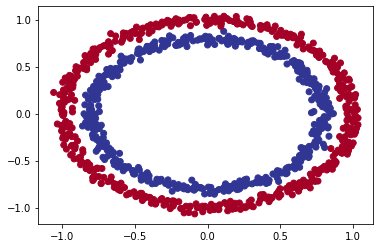

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

## Input and output shape

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...


In [ ]:
import tensorflow as tf

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the app
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240


In [ ]:
# Let's train it for longer
model_1.fit(X, y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 3.9453 - accuracy: 0.4180
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 3.8491 - accuracy: 0.4130
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 3.8110 - accuracy: 0.4140
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 3.7890 - accuracy: 0.4190
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 3.7608 - accuracy: 0.4210
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 3.6151 - accuracy: 0.4370
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 3.5480 - accuracy: 0.4440
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 3.5293 - accuracy: 0.4430
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 3.5047 - accuracy: 0.4450
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 3.4199 - accuracy: 0.4470
Epoch 11/

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4910


[0.6931543350219727, 0.4909999966621399]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the app
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 54s 2ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3804 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2279 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7024 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 2.4002 - accuracy: 0.5000
Epoch 11

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7178 - accuracy: 0.4860


[0.7177660465240479, 0.4860000014305115]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`

This function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're creating predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if (len(y_pred[0]) > 1):
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c = y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


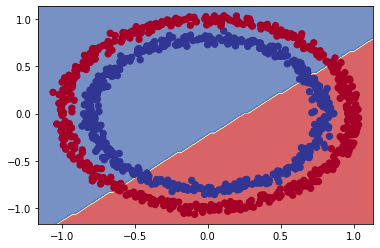

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3,
                       X = X,
                       y = y)

## The missing piece: Non-linearity

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ["accuracy"])

model_4.fit(X, y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 0.6727 - accuracy: 0.5890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9220
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.9700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9480
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9900
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9930
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 0.9740
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9940
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9940
Epoch 11/100
32/32 [=

doing binary classification


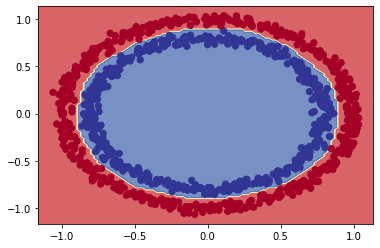

In [ ]:
plot_decision_boundary(model_4, X, y)

In [ ]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 6.6448e-06 - accuracy: 1.0000


[6.644762379437452e-06, 1.0]

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

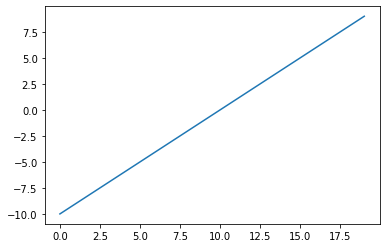

In [ ]:
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid => sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

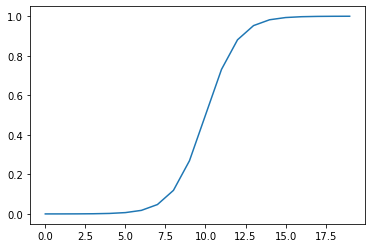

In [ ]:
# Plot
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate the relu function

def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

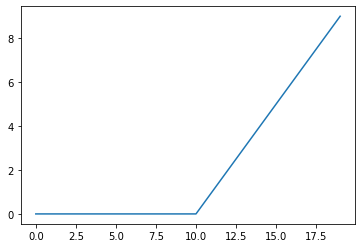

In [ ]:
plt.plot(relu(A));

## Evaluating and improving our classification

We've been using training and testing on the same dataset so let's creating a trianing and test set

In [ ]:
len(X)

1000

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)
display(X_train)
display(y_train)

array([[ 0.65794626, -0.46508097],
       [ 0.63194897, -0.7346633 ],
       [-1.00861631, -0.12403051],
       ...,
       [ 0.01574478, -1.02998534],
       [ 1.01102578,  0.16802846],
       [ 0.55778227, -0.57087612]])

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.random.set_seed(42)

#1. create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_5.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6835 - accuracy: 0.5387
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.8288
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9187
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0740 - accuracy: 0.9762
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9937
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9762
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9850
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9887
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9925
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9937
Epoch 11/

In [ ]:
model_5.evaluate(X_test, y_test) # WOO HOOOOOO

7/7 [==============================] - 0s 3ms/step - loss: 9.3156e-04 - accuracy: 1.0000


[0.0009315570932812989, 1.0]

doing binary classification
doing binary classification


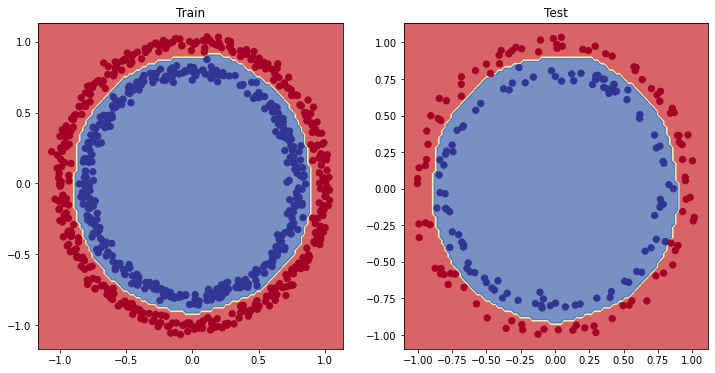

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X = X_test, y= y_test)
plt.show();

## Plot the loss curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.683516,0.53875
1,0.441440,0.82875
2,0.180646,0.91875
3,0.074042,0.97625
4,0.031371,0.99375
...,...,...
95,0.000021,1.00000
96,0.000022,1.00000
97,0.000021,1.00000
98,0.000020,1.00000


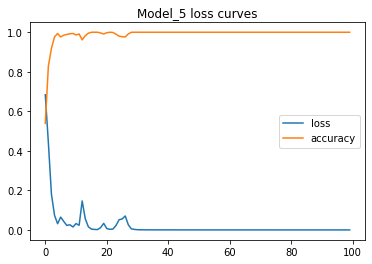

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_5 loss curves");

##  Finding the best learning rate

To find the best learning rate, we can use:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training
* Another model
* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_6 = model_6.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6943 - accuracy: 0.4875 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.4913 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6899 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6872 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6858 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6842 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6821 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

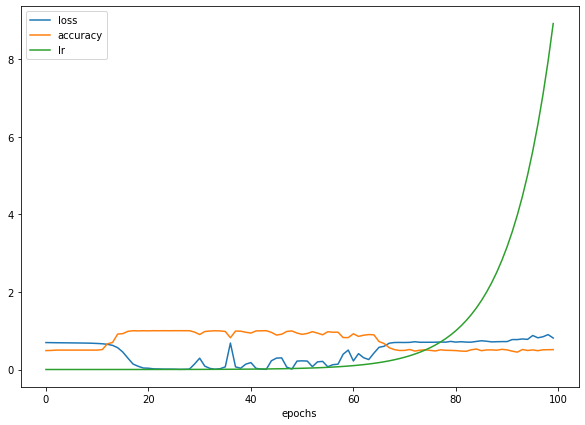

In [ ]:
pd.DataFrame(history_6.history).plot(figsize = (10,7), xlabel = "epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

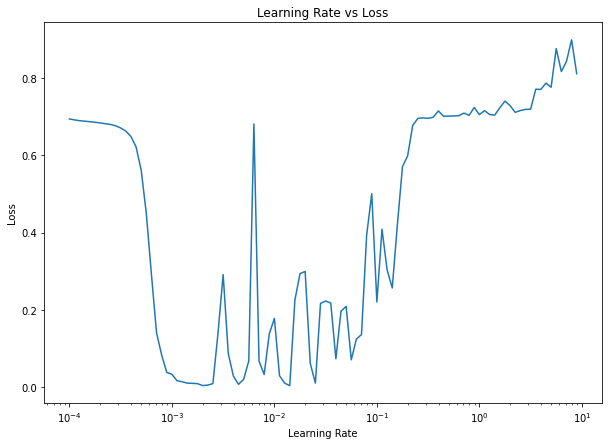

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_6.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
tf.random.set_seed(42)

#1. create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0008),
                metrics = ["accuracy"])

# 3. Fit the model
history_6 = model_6.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6905 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.6037
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.5750
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.8875
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.9625
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.9950
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1186 - accuracy: 0.9975
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 1.0000
Epoch 11/

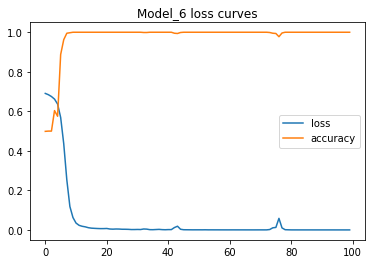

In [ ]:
pd.DataFrame(history_6.history).plot()
plt.title("Model_6 loss curves");

In [ ]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 1.0000


[0.0027609970420598984, 1.0]

## More classification evaluation methods

Alongside visualizing our models results, there are a handful of other classification evaluation methods & metrics:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report from sklearn

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Model loss on the test set: 0.0027609970420598984
Model accuracy on the test set: 100.00%


Confusion Matrix

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model_6.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds)) # we round because it's in prediction probability form

array([[100,   0],
       [  0, 100]])

Looks like we have 0 false positives and false negatives!

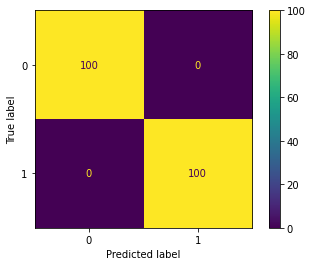

In [ ]:
# Prettify our confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classificaiton**.

To practice, we are going to classify images of different items of clothing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

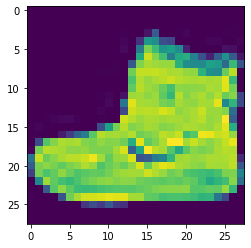

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Create a small list so we can index onto our training labels so they're human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker",
               "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

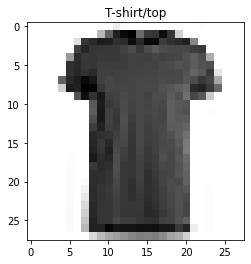

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

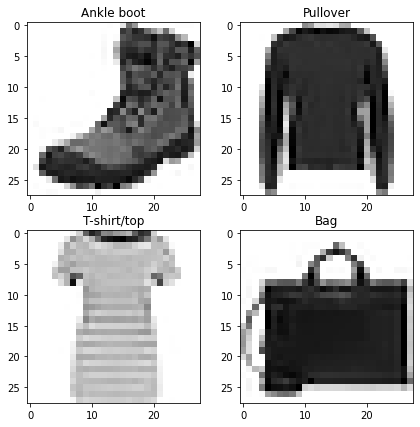

In [ ]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

## Building a multi-class classification model

For our multi-class classification, we have tweak a few things

* Input shape = (28,28) => the shape of one image
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.SparseCategoricalCrossEntropy()
  * If your labels are encoded, use CategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)


In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "softmax"),
    tf.keras.layers.Dense(10)
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


history_1 = model_1.fit(train_data,
                        train_labels,
                        epochs = 15,
                        validation_data = (test_data, test_labels))


Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 2.6518 - accuracy: 0.1042 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy

🔑**Neural Networks prefer data to be normalized. This means they prefer numbers between 0 and 1**

In [ ]:
train_data.max()

255

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum number
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "sigmoid")
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

norm_history = model_2.fit(train_data_norm,
            train_labels,
            epochs = 20,
            validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4763 - accuracy: 0.8280 - val_loss: 0.3888 - val_accuracy: 0.8568
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3563 - accuracy: 0.8702 - val_loss: 0.4499 - val_accuracy: 0.8446
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3232 - accuracy: 0.8800 - val_loss: 0.3750 - val_accuracy: 0.8657
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2989 - accuracy: 0.8892 - val_loss: 0.3840 - val_accuracy: 0.8622
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2834 - accuracy: 0.8936 - val_loss: 0.3503 - val_accuracy: 0.8727
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2670 - accuracy: 0.8985 - val_loss: 0.3738 - val_accuracy: 0.8613
Epoch 7/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2556 - accuracy: 0.9041 - val_loss: 0.3566 - val_accuracy:

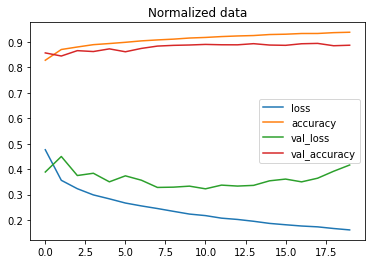

In [ ]:
import pandas as pd
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title = "Normalized data")

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

find_lr_history = model_3.fit(train_data_norm,
                              train_labels,
                              epochs = 40,
                              validation_data = (test_data_norm, test_labels),
                              callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4773 - accuracy: 0.8276 - val_loss: 0.3960 - val_accuracy: 0.8549 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3646 - accuracy: 0.8654 - val_loss: 0.4305 - val_accuracy: 0.8510 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3362 - accuracy: 0.8758 - val_loss: 0.4047 - val_accuracy: 0.8542 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3162 - accuracy: 0.8836 - val_loss: 0.3824 - val_accuracy: 0.8581 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3021 - accuracy: 0.8873 - val_loss: 0.3671 - val_accuracy: 0.8642 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2947 - accuracy: 0.8899 - val_loss: 0.3838 - val_accuracy: 0.8559 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 

Text(0.5, 1.0, 'Finding the ideal learning rate')

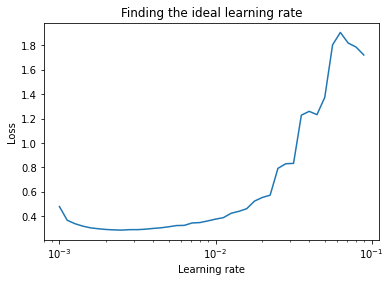

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

So 0.001 works the best, which is the default :)

## Evaluating our multi-class classification model

To evaluate:
* Evaluate its performance using other classification metrics such as confusion matrix
* Assess some of its predictions (visualize)
* Improve its results 
* Save and export it for use in an application

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_data[0], test_data_norm[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you want to make predictions on normalized data)

In [ ]:
# Make some predictions with our mode
y_probs = model_2.predict(test_data_norm) # prediction probabilities

y_probs[:5]

array([[6.91001187e-05, 3.90079413e-06, 2.96180697e-05, 2.97396073e-05,
        2.39154696e-03, 1.92556292e-01, 7.11947680e-04, 2.02278972e-01,
        4.74303448e-07, 9.95369554e-01],
       [2.07465053e-01, 4.81917395e-09, 9.99994218e-01, 4.37046737e-07,
        9.88696814e-01, 8.90566199e-08, 5.21699905e-01, 9.72707158e-13,
        8.41068584e-08, 3.11415088e-10],
       [1.01376318e-05, 1.00000000e+00, 5.50445843e-12, 4.05511260e-03,
        4.42892549e-08, 1.03222760e-15, 1.39160534e-07, 2.73975042e-28,
        1.63353470e-10, 8.76074742e-21],
       [3.10625842e-06, 1.00000000e+00, 3.56077635e-13, 5.60815990e-01,
        8.27817015e-09, 2.60645887e-15, 8.58291685e-07, 1.03659337e-27,
        3.06921127e-10, 3.11259663e-20],
       [9.93136406e-01, 6.60835608e-10, 8.50953996e-01, 3.52352858e-04,
        2.21025437e-01, 3.14123964e-14, 9.99678195e-01, 3.07322003e-16,
        1.03031975e-11, 1.68521555e-13]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([6.9100119e-05, 3.9007941e-06, 2.9618070e-05, 2.9739607e-05,
        2.3915470e-03, 1.9255629e-01, 7.1194768e-04, 2.0227897e-01,
        4.7430345e-07, 9.9536955e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis =1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[828,   2,  10,  22,   6,   1, 125,   0,   6,   0],
       [  1, 982,   1,   9,   4,   0,   3,   0,   0,   0],
       [ 14,   1, 775,   7, 131,   0,  72,   0,   0,   0],
       [ 15,   4,   7, 893,  52,   0,  25,   0,   4,   0],
       [  0,   0,  58,  17, 888,   0,  37,   0,   0,   0],
       [  0,   0,   0,   1,   0, 966,   0,  14,   0,  19],
       [ 96,   2,  70,  22,  93,   0, 712,   0,   5,   0],
       [  0,   0,   0,   1,   0,  39,   0, 951,   1,   8],
       [  4,   0,   4,   1,  12,   3,   6,   1, 969,   0],
       [  1,   0,   1,   1,   0,  10,   0,  79,   1, 907]])

In [ ]:
import seaborn as sns

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

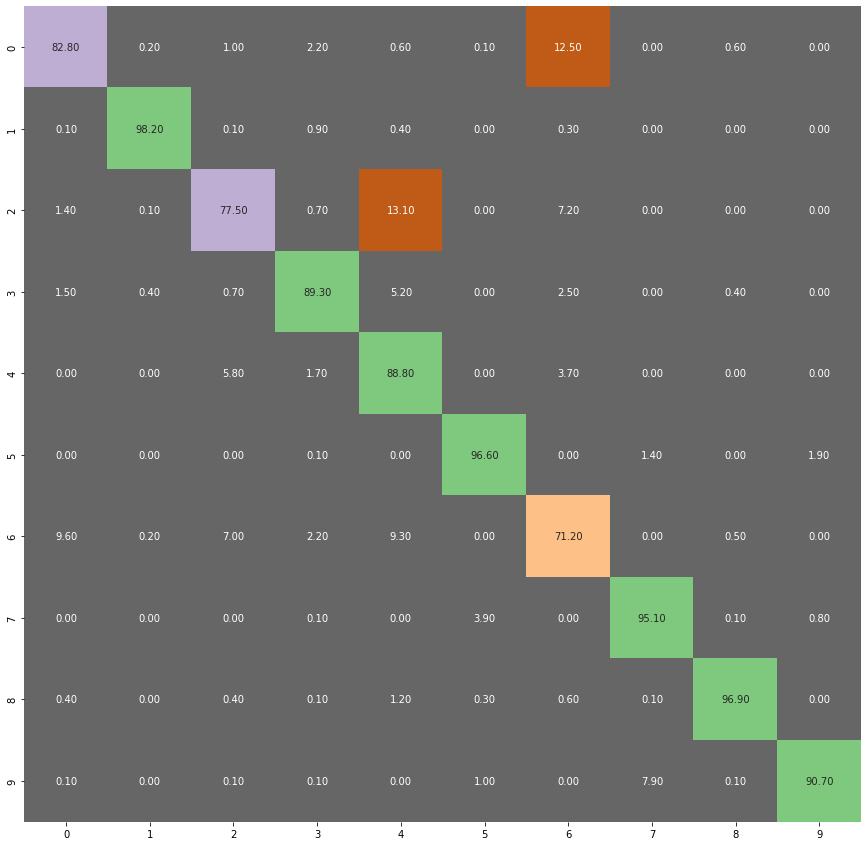

In [ ]:
cm = confusion_matrix(y_true = test_labels,y_pred=y_preds)
plt.figure(figsize=(15,15))
sns.heatmap(cm/len(class_names),annot=True,cbar=False,fmt='.2f',cmap='Accent_r')

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your model

* plot a random image
* Make a prediction on said image
* Label the plot with truth label & predicted label

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red






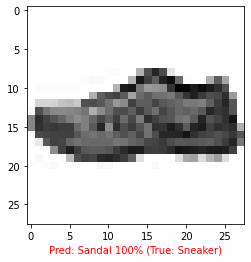

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_2, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_2.layers

In [ ]:
# Extract a particular layers
model_2.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_2.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 1.3735651e-02, -5.5617895e-02,  3.4672230e-02, ...,
         -1.0573998e-02, -2.7622813e-01,  1.8030779e-01],
        [-5.1692586e-02, -1.4827408e-02,  1.1026428e-01, ...,
          2.0139857e-01, -2.1906467e-01,  4.1712171e-01],
        [-3.2609656e-02, -2.9528341e-01,  9.8754704e-02, ...,
          2.1998255e-01, -1.2110328e-01, -1.1992492e-01],
        ...,
        [ 1.5029107e-01, -6.4634204e-01,  1.5647873e-01, ...,
          7.4168637e-02, -9.0834558e-02,  2.3298357e-01],
        [-3.8621999e-02,  6.4346865e-02, -1.3832015e-01, ...,
          1.2737083e-01, -9.3191452e-02,  3.8834751e-01],
        [ 2.8987657e-04, -2.0032384e-01,  4.2470988e-02, ...,
         -4.2389121e-02, -2.3323387e-01,  7.9737037e-01]], dtype=float32),
 (784, 300))

In [ ]:
28*28

784

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Let's check the bias vector

In [ ]:
# Bias and biases shapes
biases, biases.shape


(array([ 2.32711241e-01, -3.63418132e-01,  2.22385004e-01, -1.30983097e-02,
        -4.09885526e-01,  8.21472798e-03,  8.22735205e-02,  3.50489765e-01,
        -2.24745616e-01,  9.32863951e-02,  2.81551510e-01,  1.34812996e-01,
         5.80637515e-01, -5.35566390e-01, -2.97746360e-01,  4.49431747e-01,
         3.67448753e-04,  1.76125541e-01, -2.08743826e-01,  2.74972260e-01,
        -1.74435768e-02,  1.18248813e-01,  1.76448897e-01, -5.85912392e-02,
         4.56313342e-01, -1.44106776e-01,  3.38927917e-02,  5.49016714e-01,
         5.10814786e-01,  1.72482524e-02, -4.28212769e-02,  5.56761503e-01,
        -1.22431032e-01,  3.59160721e-01,  4.74237315e-02,  2.64332712e-01,
         2.72575557e-01,  1.46532014e-01,  2.38818169e-01,  1.21581465e-01,
         1.29785389e-01,  2.06330374e-01,  3.89858514e-01,  8.72791469e-01,
         4.07400757e-01,  2.14567155e-01,  7.23676849e-03,  4.39496696e-01,
         1.32395606e-02, -1.56006310e-02, -1.09528497e-01,  3.65789413e-01,
         1.9

Every neuron has a bias vector. each of these is paired with a weights matrix.

The bias vector gets initialized as zeros.

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

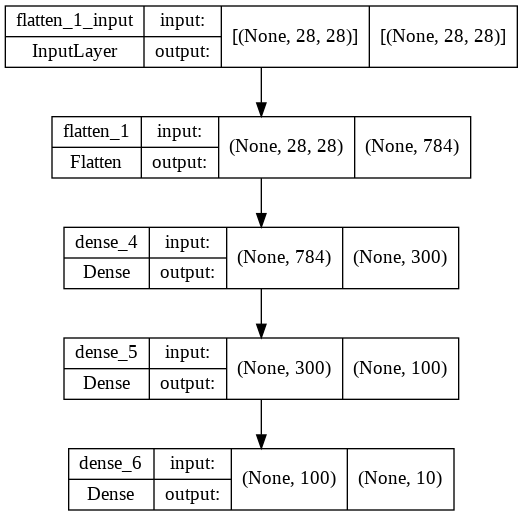

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes = True)